In [63]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

In [64]:
df_cleaned=pd.read_csv('https://raw.githubusercontent.com/rkamatn/weather/refs/heads/main/data/clean_seattle_portland_weather.csv') #Read the cleaned data  
df_cleaned.tail()

,date,city,precipitation,day_of_year
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364
3651,2022-12-31,SEA,0.17,365


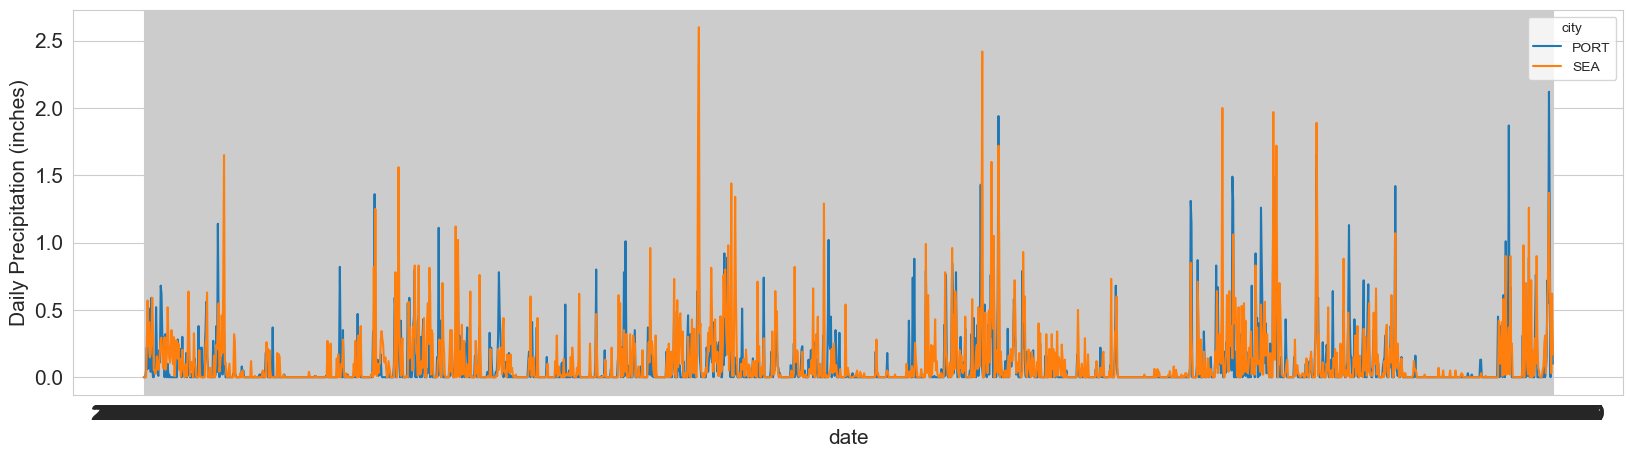

In [65]:
# Plot the precipitation data for both cities using lineplot

plt.figure(figsize=(20,5))
sns.lineplot(data=df_cleaned,x="date",y="precipitation",hue='city') 
plt.xlabel("date",fontsize=15)
plt.ylabel("Daily Precipitation (inches)",fontsize=15) 
plt.tick_params(labelsize=15)
plt.show()

In [66]:
df_cleaned[['city','precipitation']].groupby('city').describe() # Calculates basic descriptive statistics using groupby and describe

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
PORT        1826.0  0.088729  0.208064  0.0  0.0  0.00  0.08  2.12
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

In [67]:
df_cleaned[['city','precipitation']].groupby('city').mean() # Calculates mean precipitation for both cities using groupby and mean

,precipitation
city,
PORT,0.088729
SEA,0.113270


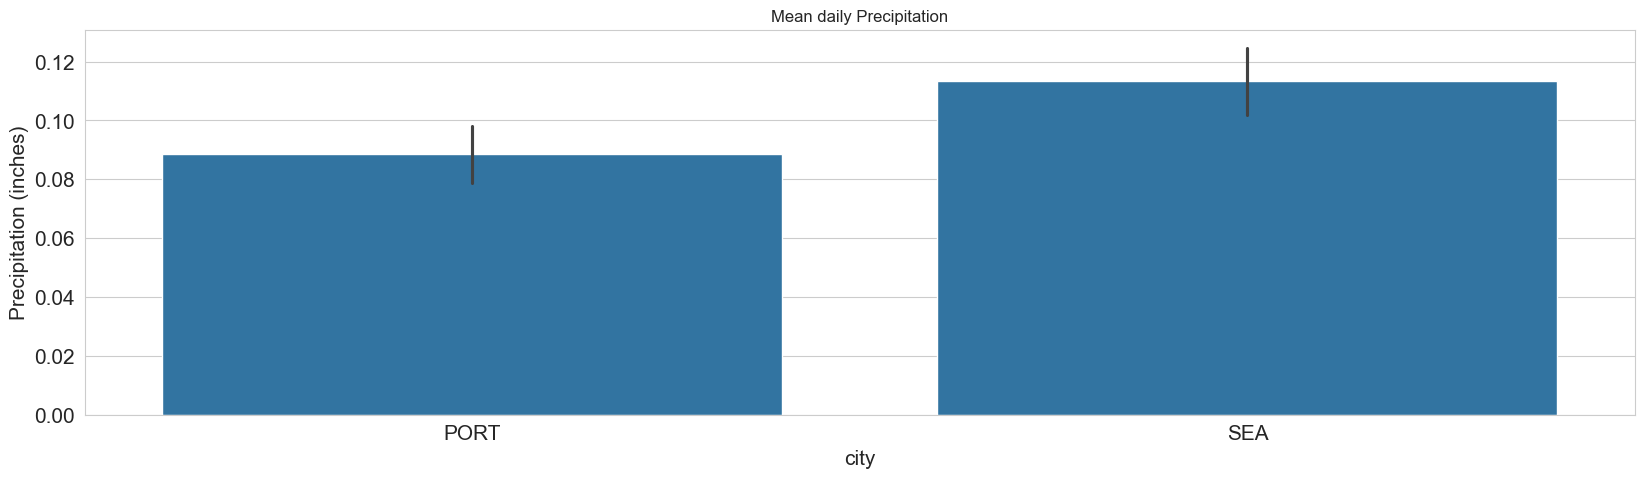

In [79]:
# Creates a bar plot of mean daily precipitation for each city

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned,x="city",y="precipitation")
plt.xlabel("city",fontsize=15)
plt.ylabel("Precipitation (inches)",fontsize=15) 
plt.title("Mean daily Precipitation")
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
df_cleaned['month']=pd.DatetimeIndex(df_cleaned['date']).month #Creates a new column for the month
df_cleaned.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,PORT,0.00,1,1
1,2018-01-02,PORT,0.00,2,1
2,2018-01-03,PORT,0.00,3,1
3,2018-01-04,PORT,0.05,4,1
4,2018-01-05,PORT,0.22,5,1


In [70]:
df_cleaned['month'].unique() #Check the unique values in the month column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

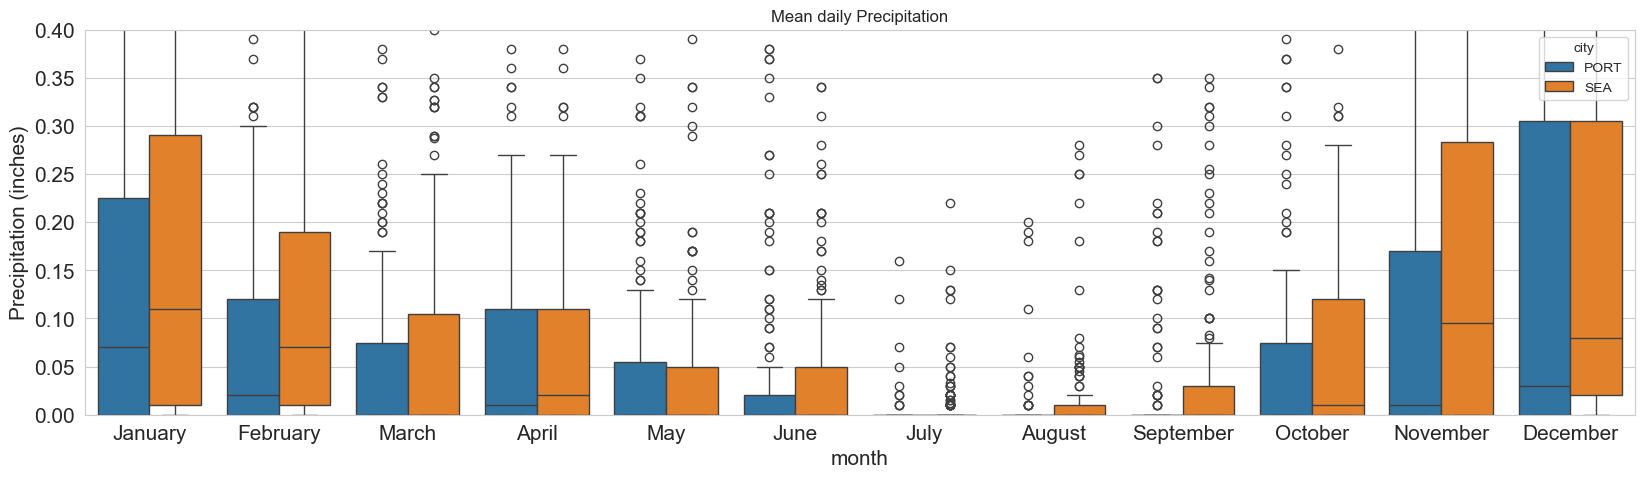

In [84]:
# Create a box plot of precipitation by month for each city

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned,x="month",y="precipitation",hue='city')
plt.xlabel("month",fontsize=15)
plt.ylabel("Precipitation (inches)",fontsize=15) 
plt.title("Mean daily Precipitation")
plt.tick_params(labelsize=15)

# Get month names and set x-ticks labels
import calendar
month_names=list(calendar.month_name[1:]) # Get month names for x-axis labels
plt.xticks(ticks=range(12),labels=month_names) # Set x-ticks to month names
plt.ylim(0,0.4)
plt.show()

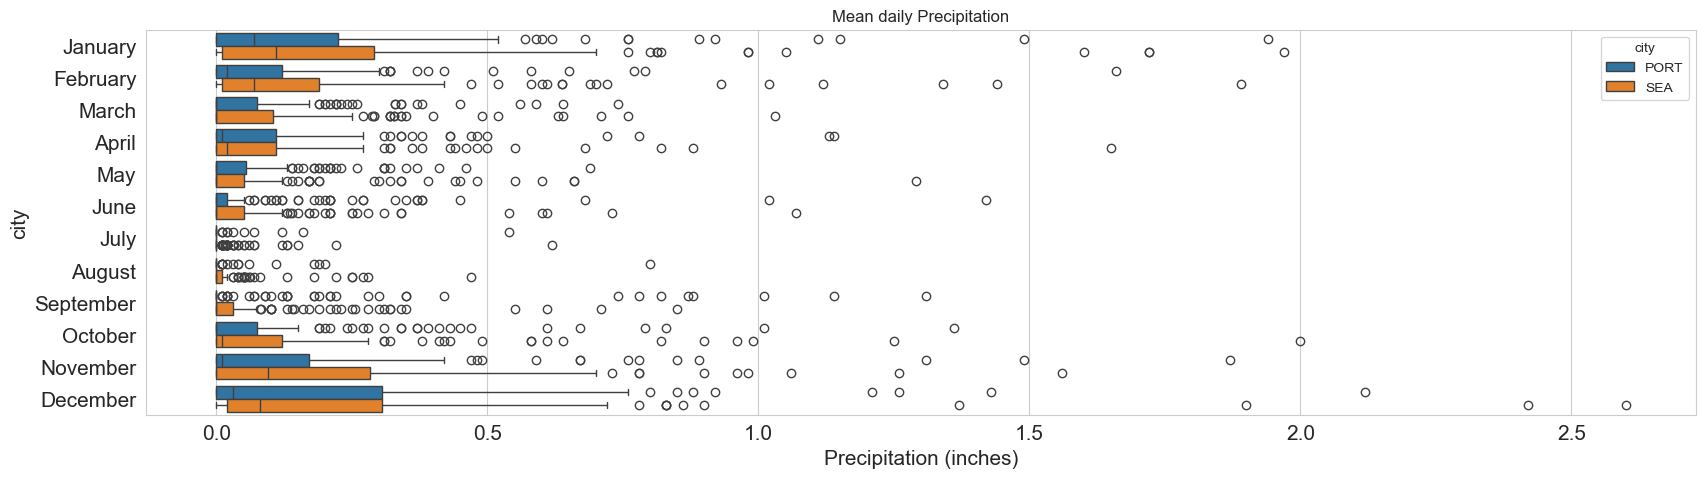

In [ ]:
# Modify the box plot to orient horizontally

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned,y="month",x="precipitation",hue='city',orient='h')
plt.ylabel("city",fontsize=15)
plt.xlabel("Precipitation (inches)",fontsize=15) 
plt.title("Mean daily Precipitation")
plt.tick_params(labelsize=15)

import calendar
month_names=list(calendar.month_name[1:])
plt.yticks(ticks=range(12),labels=month_names)
plt.show()

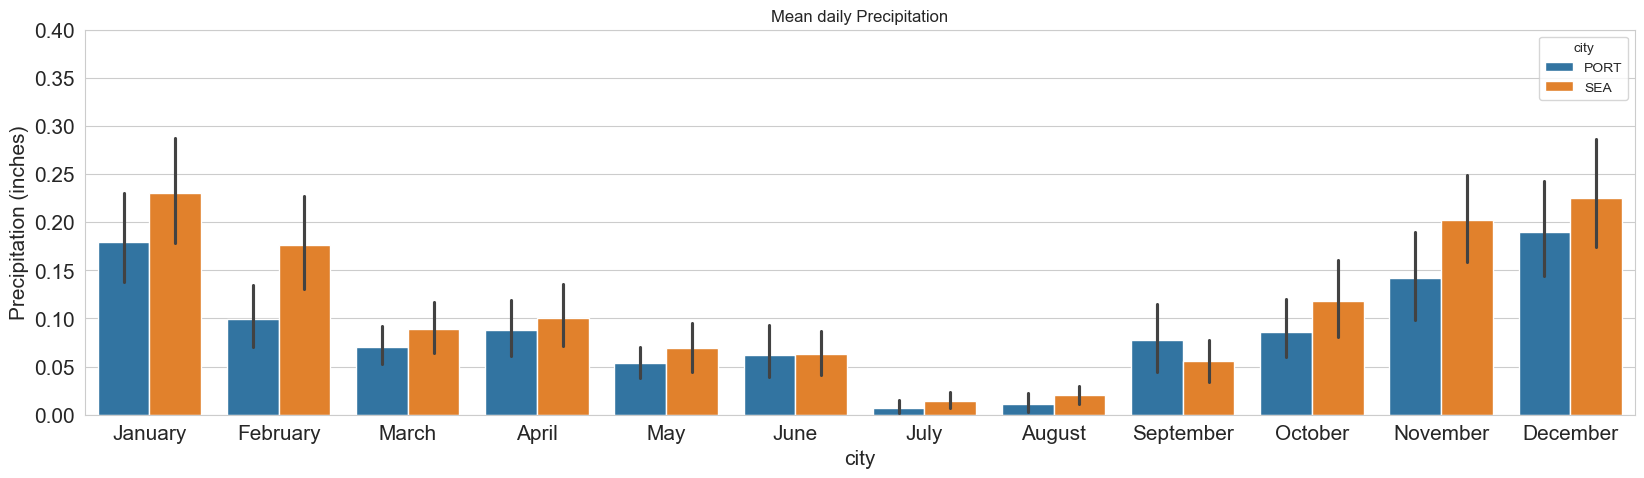

In [83]:
#  Zoom in on the bar plot to show mean daily precipitation by month for each city

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned,x="month",y="precipitation",hue='city')
plt.xlabel("city",fontsize=15)
plt.ylabel("Precipitation (inches)",fontsize=15) 
plt.title("Mean daily Precipitation")
plt.xticks(ticks=range(12),labels=month_names)
plt.tick_params(labelsize=15)
plt.ylim(0,0.4)
plt.show()


In [74]:
df_cleaned[['month','precipitation','city']].groupby(['city','month']).mean()# Calculate mean precipitation by city and month

precipitation
city month               
PORT 1           0.179742
     2           0.099362
     3           0.070839
     4           0.088200
     5           0.053226
     6           0.062200
     7           0.006710
     8           0.011097
     9           0.077133
     10          0.086129
     11          0.141733
     12          0.189806
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

In [ ]:
# Add a new column indicating if any precipitation occurred

df_cleaned['any_precipitation']=df_cleaned['precipitation']>0
df_cleaned.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,PORT,0.00,1,1,False
1,2018-01-02,PORT,0.00,2,1,False
2,2018-01-03,PORT,0.00,3,1,False
3,2018-01-04,PORT,0.05,4,1,True
4,2018-01-05,PORT,0.22,5,1,True


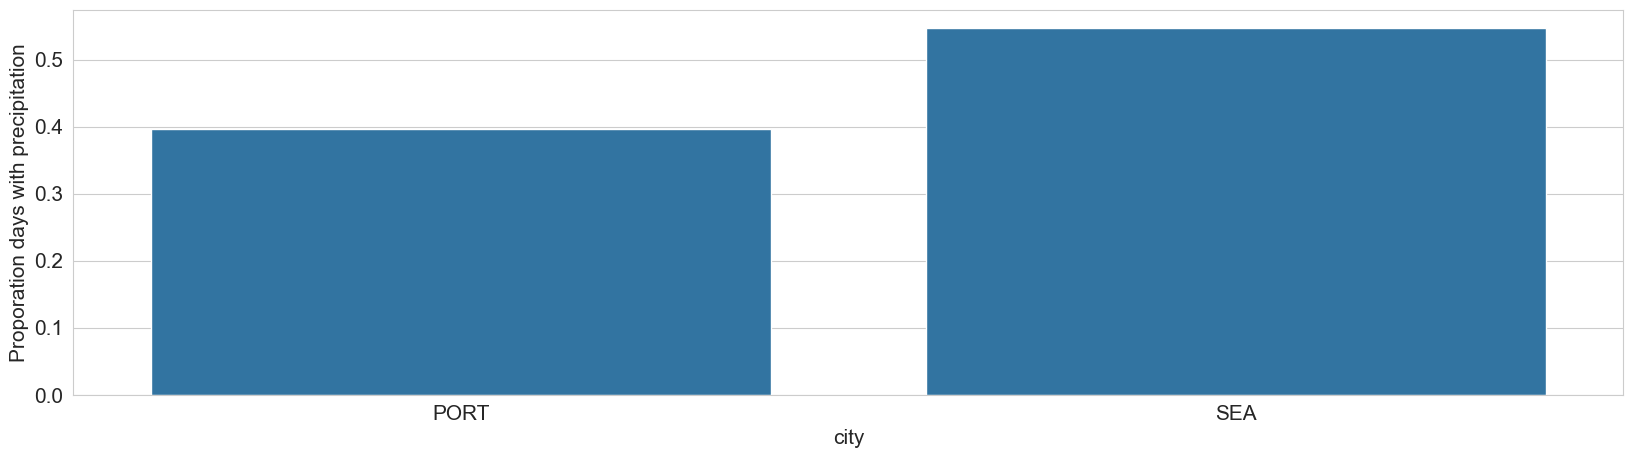

In [76]:
# Plot the proportion of days with any precipitation

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned,x="city",y="any_precipitation",errorbar=None)
plt.xlabel("city",fontsize=15)
plt.ylabel("Proporation days with precipitation",fontsize=15) 
plt.tick_params(labelsize=15)
plt.show()

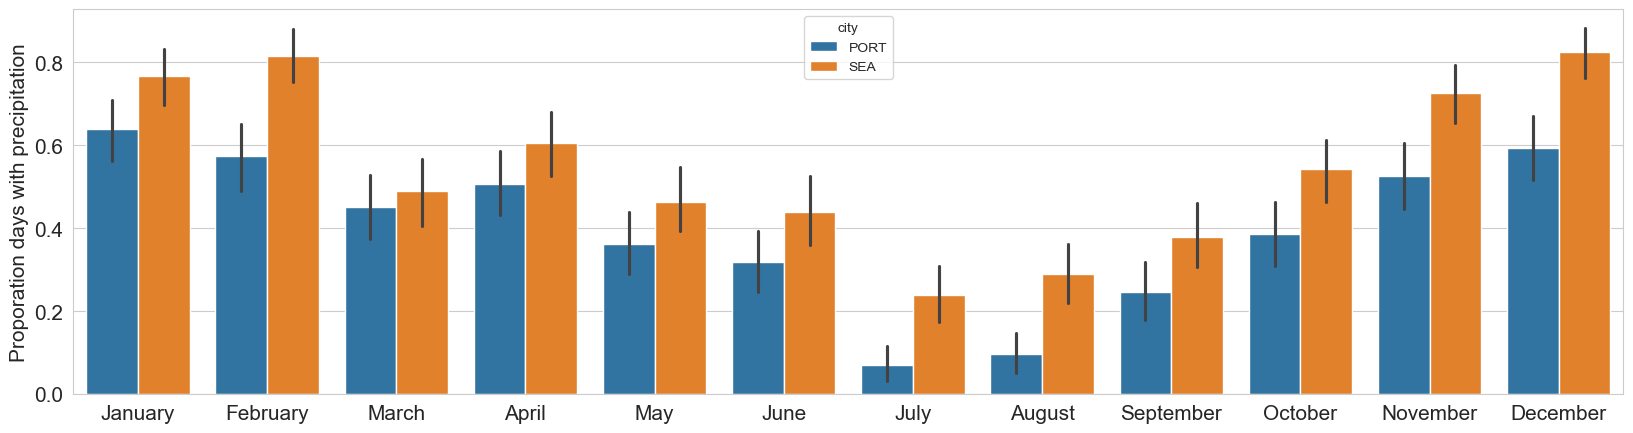

In [77]:
#Plot the proportion of days with any precipitation by month for each city

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned,x="month",y="any_precipitation",hue='city')
plt.xlabel(None)
plt.ylabel("Proporation days with precipitation",fontsize=15) 
plt.xticks(ticks=range(12),labels=month_names)
plt.tick_params(labelsize=15)
plt.show()

##Modelling   